In [1]:
# lets start with importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# read csv file and convert intp data frame
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [3]:
df.shape

(571, 43)

In [4]:
df.drop('Seat No.', axis=1, inplace=True)

In [5]:
df.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [6]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [7]:
df.isnull().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [8]:
df.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

In [9]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

In [10]:


# Create an instance of the LabelEncoder class
le = LabelEncoder()

# Loop through the relevant columns and transform them
for col in ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106','EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222','MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212','CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383','MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403','CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']:
    df[col] = le.fit_transform(df[col])

In [11]:
df.head(10)

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448
5,0,5,3,10,7,2,7,3,4,4,...,6,5,7,7,2,2,4,5,3,3.026
6,5,8,2,9,2,3,0,4,2,4,...,5,6,4,5,0,2,4,4,0,2.957
7,4,4,7,6,6,2,8,2,3,2,...,10,4,4,6,0,4,2,2,2,3.043
8,2,6,2,10,3,2,2,2,4,2,...,4,3,5,7,0,2,4,2,0,3.358
9,0,3,7,3,3,2,6,5,2,0,...,7,5,4,5,0,0,2,3,0,3.247


In [12]:
df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [13]:
df.shape

(571, 42)

In [14]:
df.head(10)

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448
5,0,5,3,10,7,2,7,3,4,4,...,6,5,7,7,2,2,4,5,3,3.026
6,5,8,2,9,2,3,0,4,2,4,...,5,6,4,5,0,2,4,4,0,2.957
7,4,4,7,6,6,2,8,2,3,2,...,10,4,4,6,0,4,2,2,2,3.043
8,2,6,2,10,3,2,2,2,4,2,...,4,3,5,7,0,2,4,2,0,3.358
9,0,3,7,3,3,2,6,5,2,0,...,7,5,4,5,0,0,2,3,0,3.247


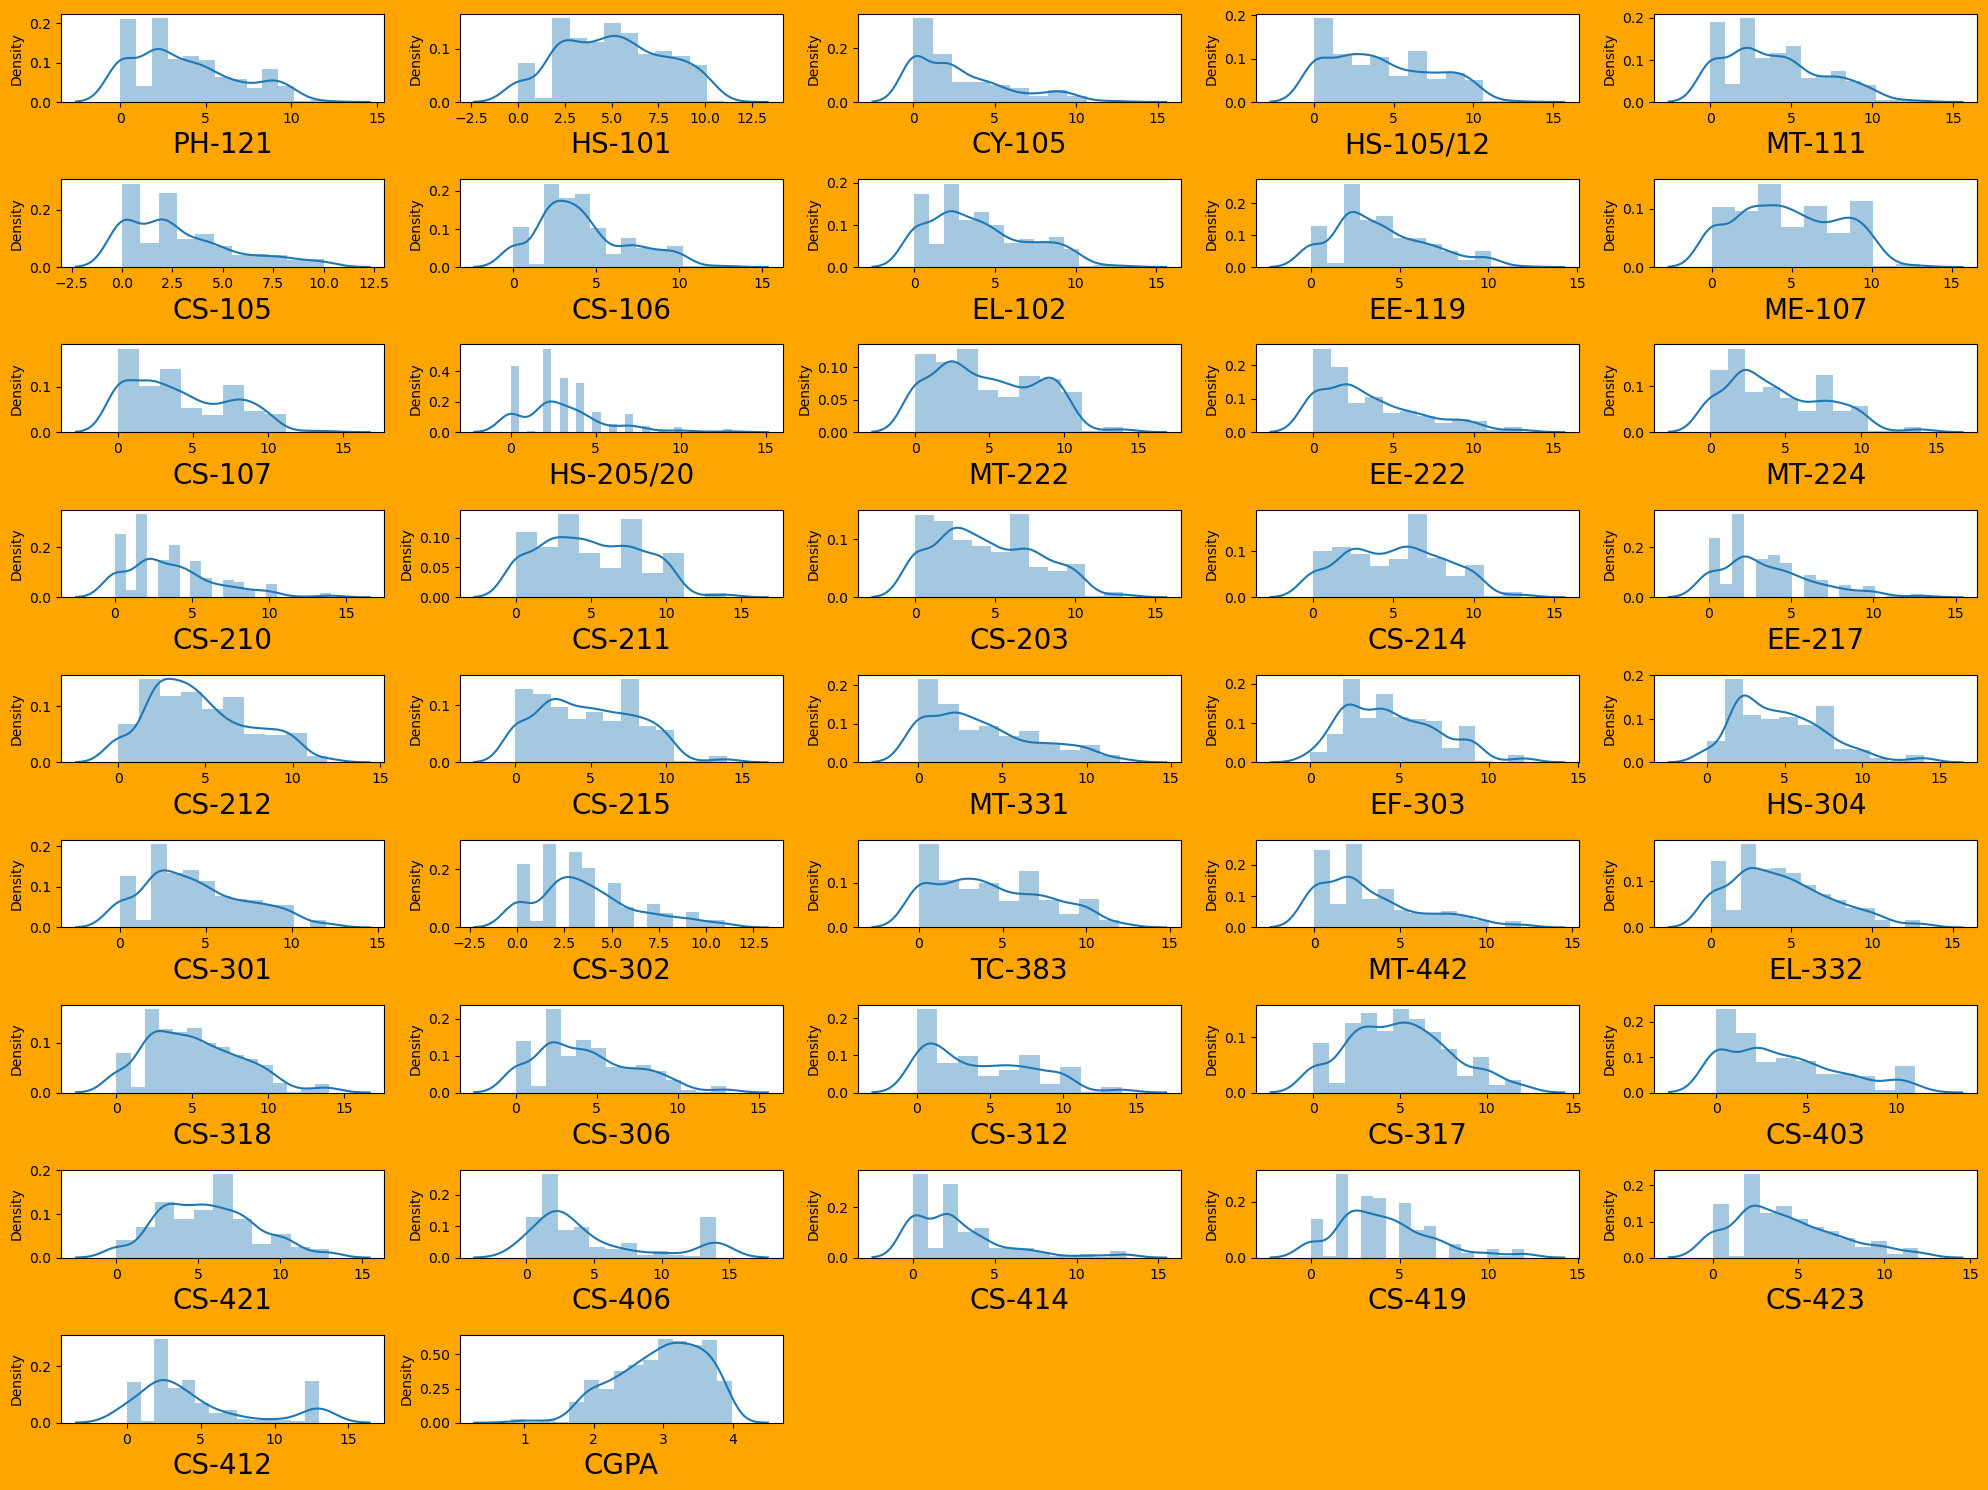

In [15]:
# lets see how data is distributed from every column
plt.figure(figsize=(20,15),facecolor='orange')
plotnumber=1

for column in df:
    if plotnumber<=42:
        ax=plt.subplot(9,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


PH-121          Axes(0.125,0.807358;0.133621x0.0726415)
HS-101       Axes(0.285345,0.807358;0.133621x0.0726415)
CY-105        Axes(0.44569,0.807358;0.133621x0.0726415)
HS-105/12    Axes(0.606034,0.807358;0.133621x0.0726415)
MT-111       Axes(0.766379,0.807358;0.133621x0.0726415)
CS-105          Axes(0.125,0.720189;0.133621x0.0726415)
CS-106       Axes(0.285345,0.720189;0.133621x0.0726415)
EL-102        Axes(0.44569,0.720189;0.133621x0.0726415)
EE-119       Axes(0.606034,0.720189;0.133621x0.0726415)
ME-107       Axes(0.766379,0.720189;0.133621x0.0726415)
CS-107          Axes(0.125,0.633019;0.133621x0.0726415)
HS-205/20    Axes(0.285345,0.633019;0.133621x0.0726415)
MT-222        Axes(0.44569,0.633019;0.133621x0.0726415)
EE-222       Axes(0.606034,0.633019;0.133621x0.0726415)
MT-224       Axes(0.766379,0.633019;0.133621x0.0726415)
CS-210          Axes(0.125,0.545849;0.133621x0.0726415)
CS-211       Axes(0.285345,0.545849;0.133621x0.0726415)
CS-203        Axes(0.44569,0.545849;0.133621x0.0

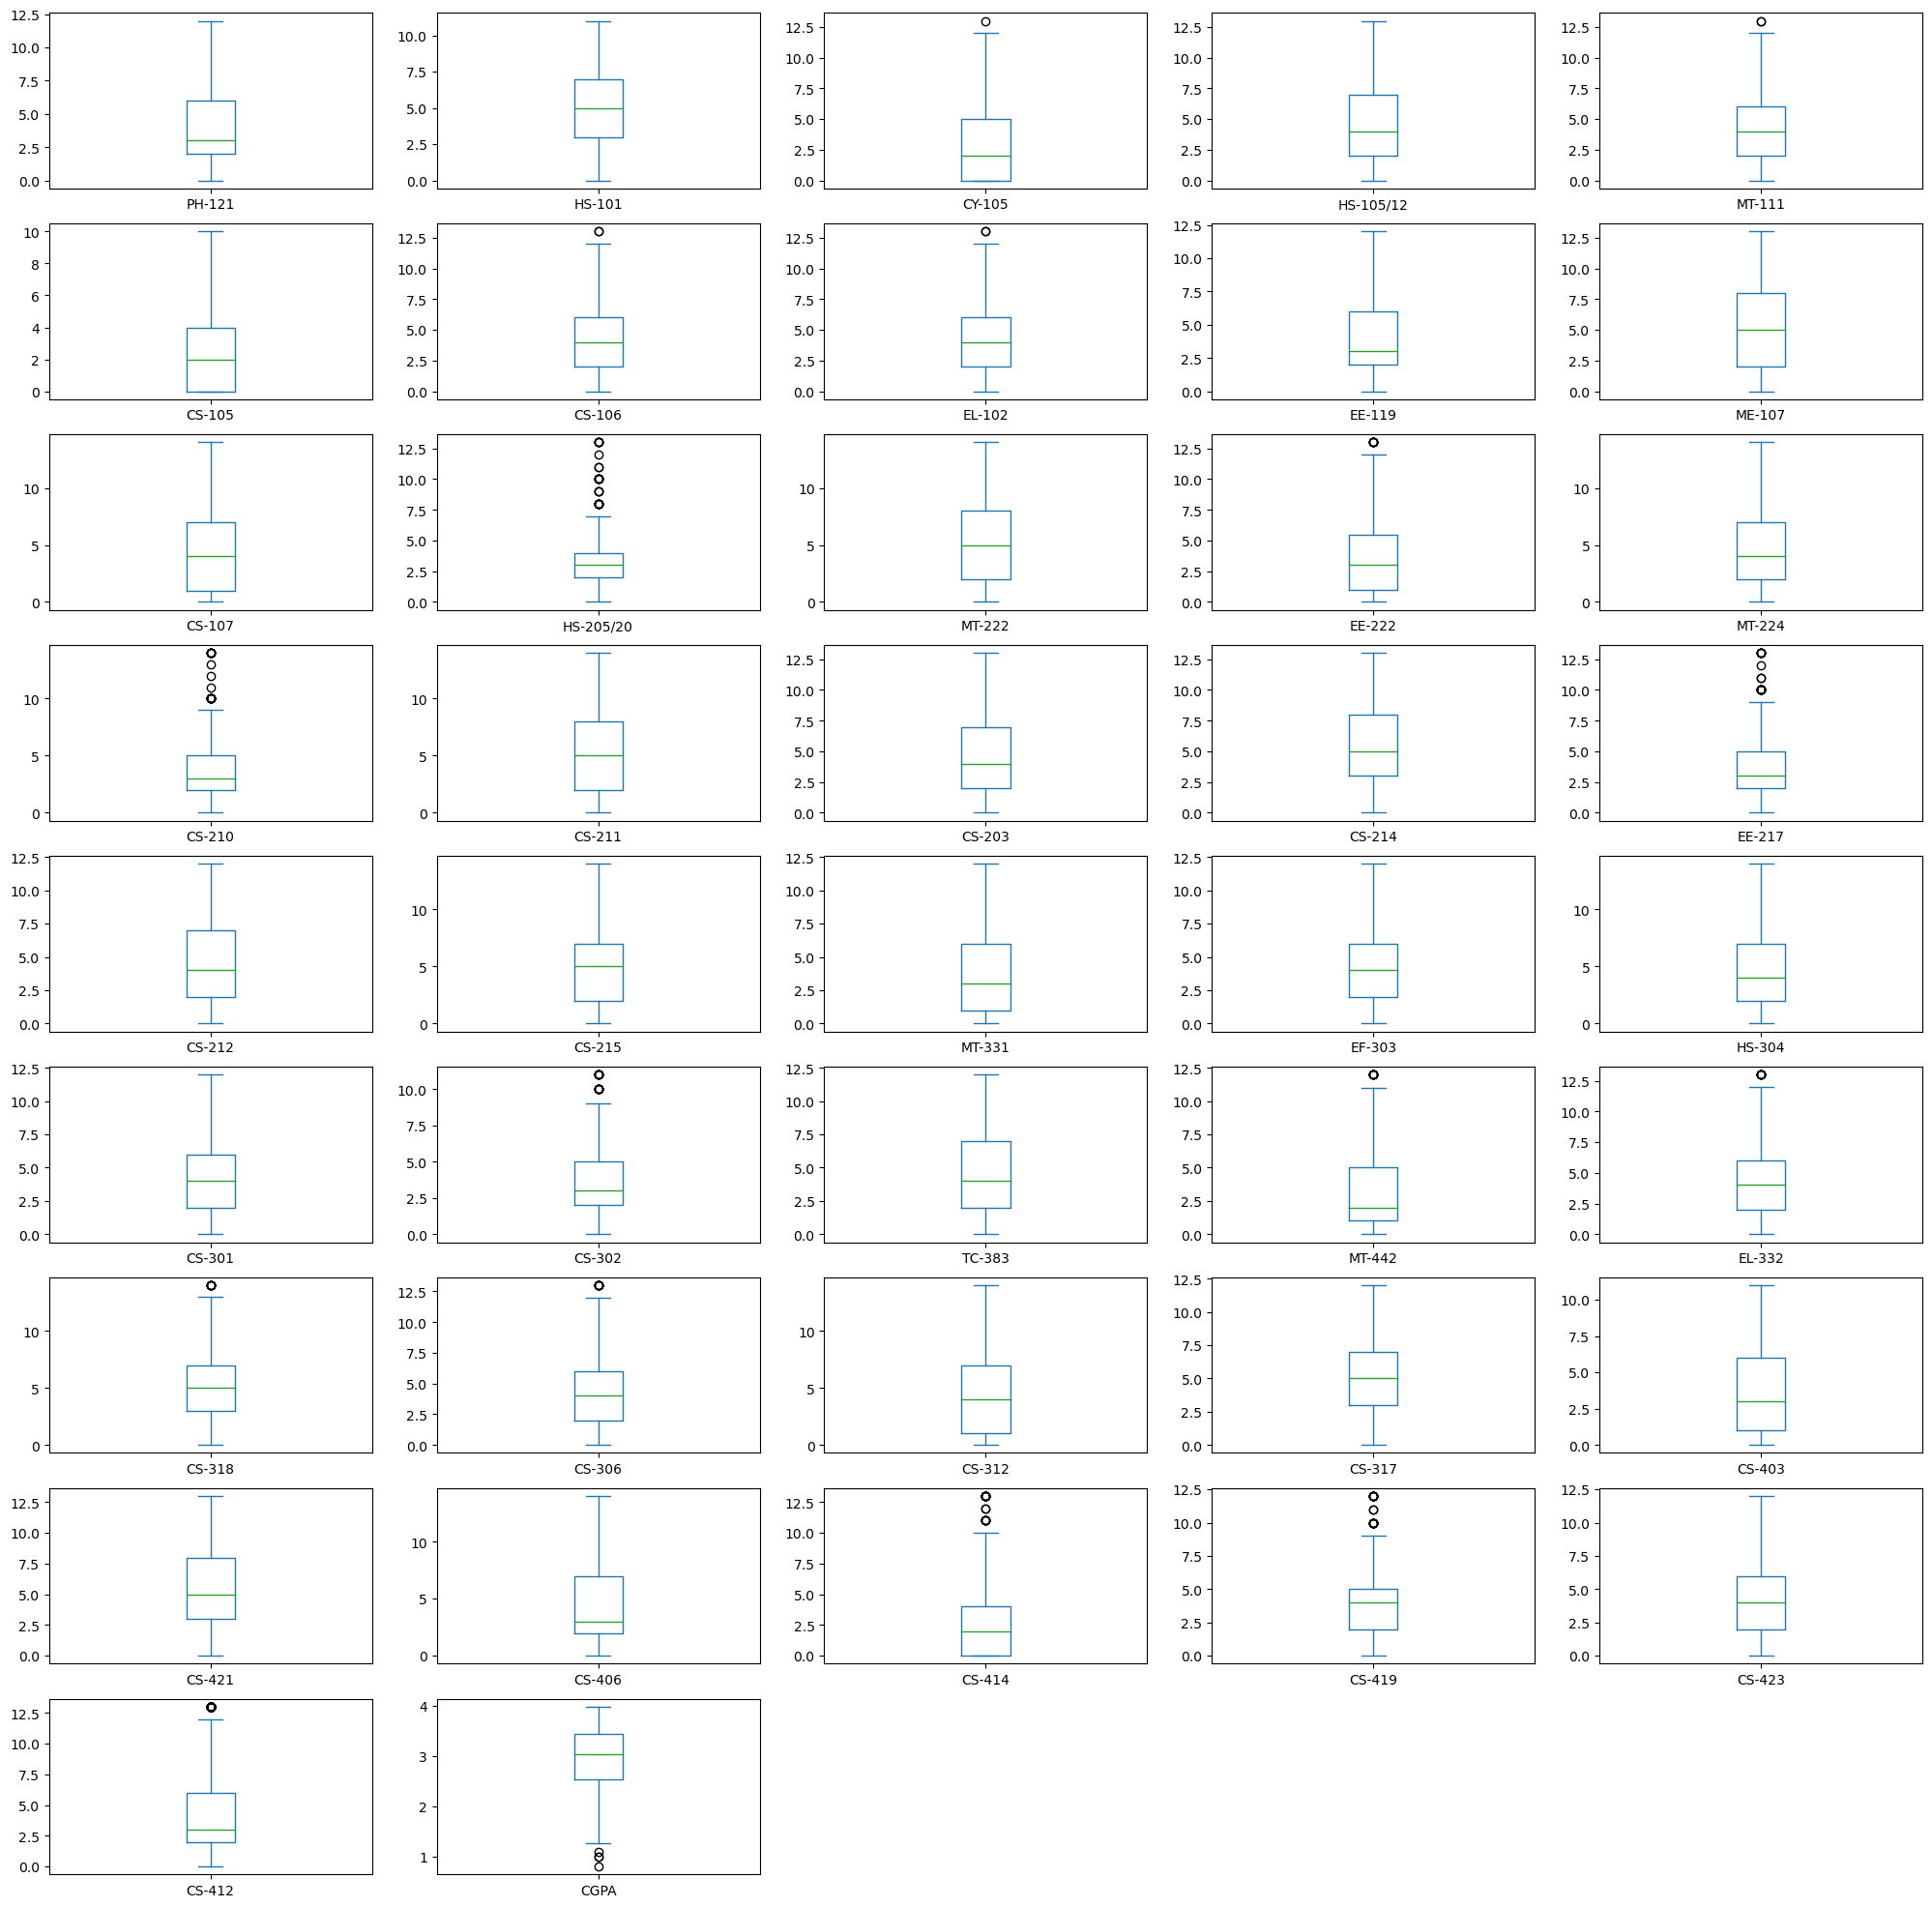

In [16]:
df.plot(kind='box',subplots=True,layout=(9,5),figsize=(25,25),sharex=False)

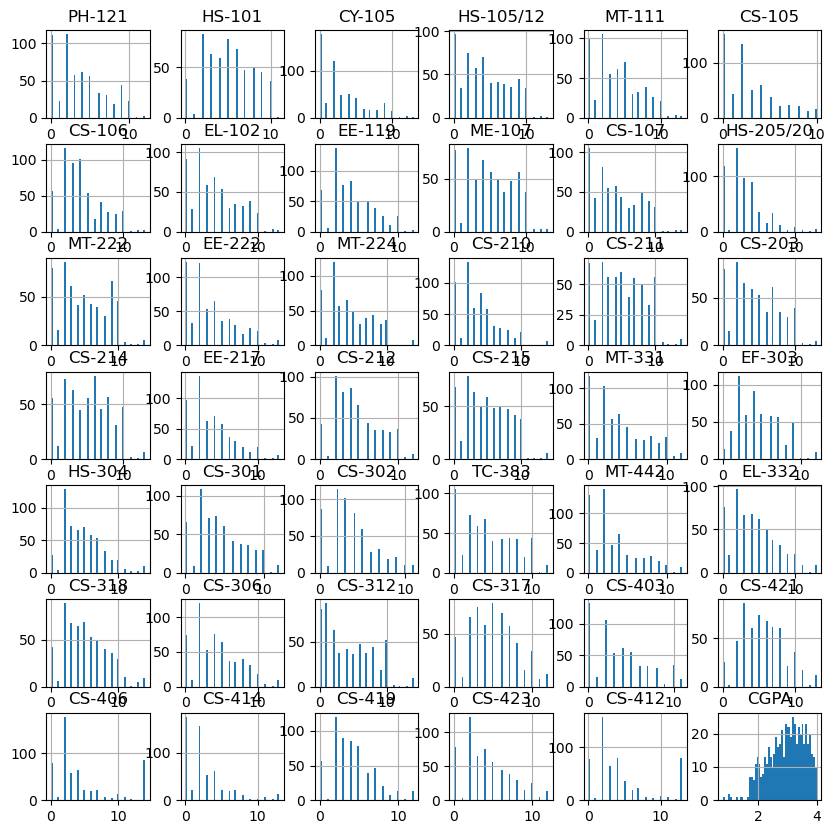

In [17]:
df.hist(figsize=(10,10),bins=50)
plt.show()

In [18]:
df.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

In [19]:
import numpy as np

# Define a function to handle outlier removal for multiple columns
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower and upper limits for outliers
    low_limit = q1 - 1.5 * iqr
    high_limit = q3 + 1.5 * iqr
    
    # Find indices of outliers
    index = np.where((df[column] < low_limit) | (df[column] > high_limit))
    
    # Drop rows with outliers
    df = df.drop(df.index[index])
    
    return df

# List of columns to handle outliers
columns_to_check = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']  

# Loop through each column and remove outliers
for col in columns_to_check:
    df= remove_outliers(df, col)

# Check the shape of the updated 'data' after removing outliers
data_shape = df.shape

# Reset index of the 'data' dataframe
df.reset_index(drop=True, inplace=True)


In [20]:
df.shape

(290, 42)

In [21]:
# divide data set into feature and label
y=df['CGPA']
X=df.drop(columns=['CGPA'])

<Axes: >

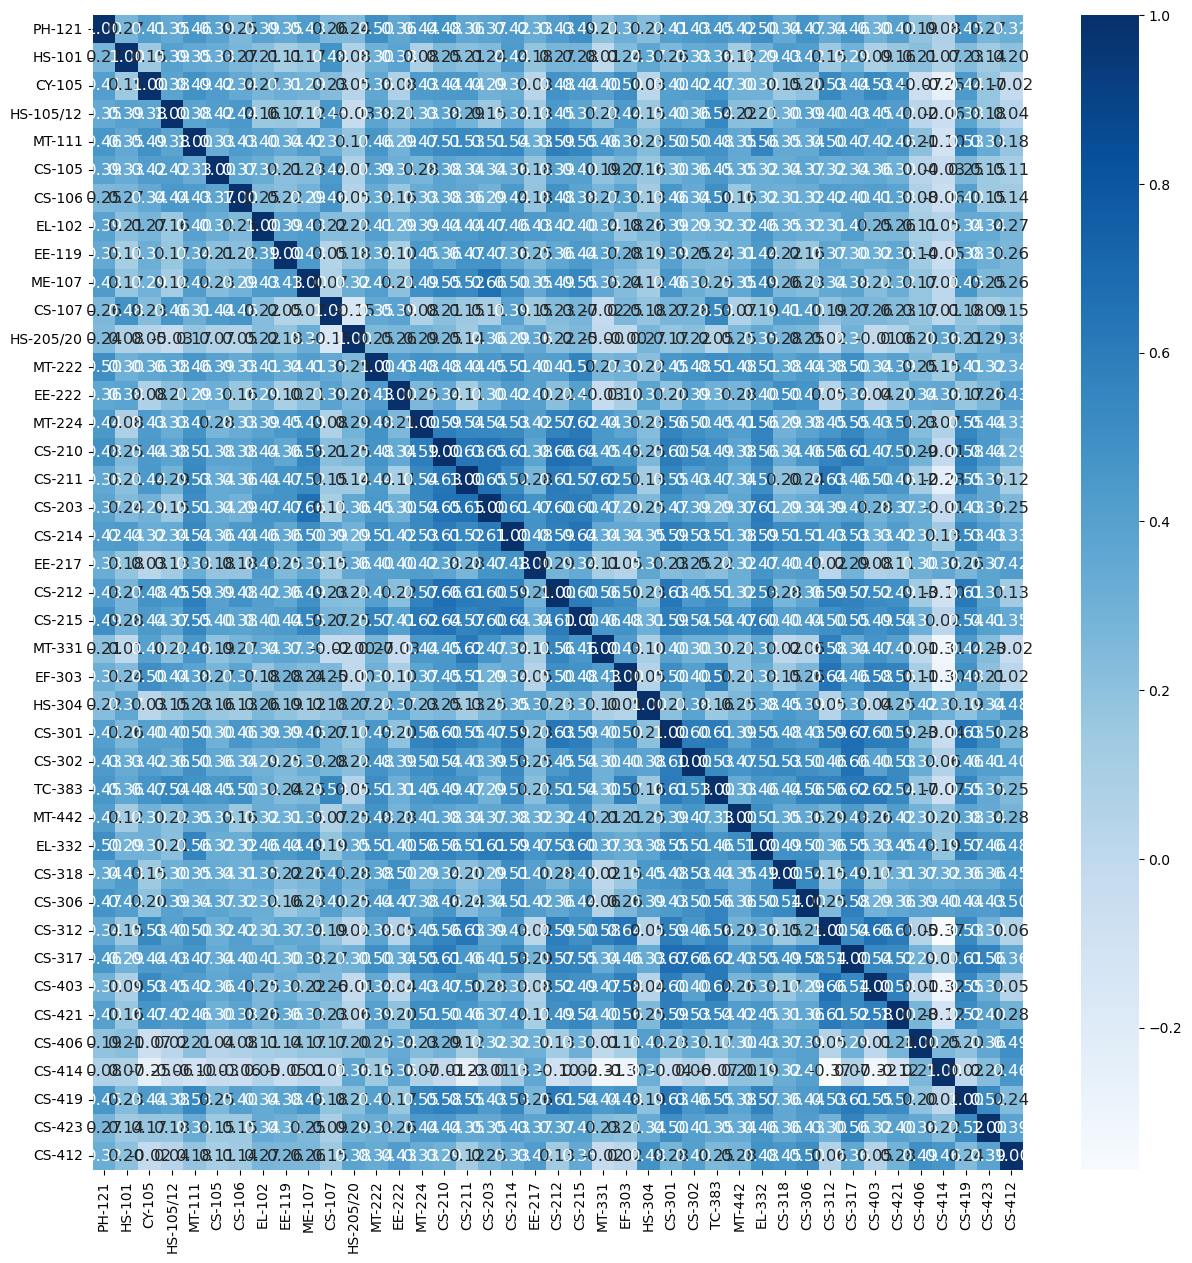

In [22]:
correlation=X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation,cbar=True,annot=True,fmt='.2f',annot_kws={'size':12},cmap='Blues')

In [23]:
# data scaling formula Z=(X-mean)/std
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 1.56544975,  2.13754029,  3.13798504, ...,  2.44045712,
        -0.34341148, -0.1200415 ],
       [-1.0139845 , -0.55929426, -0.84675787, ..., -1.47778545,
        -0.80661767, -1.30011047],
       [ 0.0177892 , -0.94455634,  0.14942786, ..., -0.49822481,
        -0.80661767, -1.30011047],
       ...,
       [ 0.53367605, -1.7150805 , -0.84675787, ...,  0.48133583,
        -0.34341148, -1.30011047],
       [-0.49809765, -1.7150805 , -0.84675787, ..., -0.49822481,
         1.04620708, -0.1200415 ],
       [ 0.53367605, -1.7150805 ,  0.14942786, ...,  0.48133583,
        -0.80661767, -0.1200415 ]])

In [24]:
# split data into train and test model will be built on training data and tested on test data.
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=375)

In [25]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [26]:
df.sample(10)

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
24,0,7,2,3,2,4,8,4,2,5,...,10,5,5,5,2,0,4,2,4,3.112
198,0,4,0,2,4,0,4,2,3,4,...,2,7,4,4,5,4,4,7,5,3.424
120,2,4,5,1,4,2,4,3,6,2,...,6,4,2,7,2,2,5,4,3,3.076
111,0,7,2,1,7,2,3,6,4,10,...,8,5,2,3,2,0,5,5,0,2.982
204,0,2,1,0,2,0,3,0,0,3,...,0,0,0,0,0,2,0,2,2,3.831
129,0,0,4,0,2,2,2,2,4,2,...,7,5,4,6,2,2,2,4,2,3.451
160,2,4,2,4,5,0,8,4,2,9,...,8,7,2,7,4,0,2,2,2,3.042
71,0,4,1,0,1,0,2,0,0,0,...,0,0,1,2,0,1,1,0,1,3.963
132,2,2,2,0,2,2,4,8,5,7,...,7,7,5,3,2,0,4,7,4,3.019
209,4,6,0,7,2,4,0,4,0,2,...,0,4,0,8,7,3,0,2,3,3.179


In [27]:
regression.score(x_train,y_train)*100

99.05752542284051

In [28]:
# since we have already fit the scaler ,ou can transform the data
print('student grade prediction is:',regression.predict(scaler.transform([[4,4,3,3,3,2,2,4,4,3,3,3,2,2,4,4,3,3,3,2,2,4,4,3,3,3,2,2,4,4,3,3,3,2,2,4,4,3,3,2,2]])))

student grade prediction is: [3.29634232]


In [29]:
regression.score(x_test,y_test)*100

98.15413950531156

In [30]:
y_pred=regression.predict(x_test)

In [31]:
y_pred

array([3.38583463, 2.98803938, 2.85575182, 3.15288544, 3.49785014,
       3.72164996, 2.89348715, 3.01902303, 3.08725896, 3.30022049,
       2.83746707, 3.41712894, 3.15798419, 3.71276527, 3.84181519,
       3.68477574, 3.31706274, 3.93282501, 3.34862189, 2.29029809,
       3.23454354, 3.33505523, 2.87811855, 3.20935028, 3.24556729,
       3.32475478, 2.89356313, 3.52146217, 3.30124332, 3.52167349,
       3.90231908, 3.46111922, 3.02737092, 3.0802204 , 2.85541174,
       3.28999086, 3.47246326, 3.28582324, 3.928032  , 3.28403704,
       2.22723364, 3.08143423, 3.07310412, 3.1335151 , 3.02661738,
       3.02728491, 3.45945839, 3.56261519, 2.93845695, 3.94248962,
       3.18201603, 3.01151264, 3.25129569, 3.32211609, 3.79110418,
       3.99853472, 3.8623887 , 3.12284416, 3.45920184, 3.79735658,
       3.13456059, 3.29412977, 3.57845785, 3.53655743, 3.89243328,
       3.26058514, 3.61396401, 3.18844997, 3.32264466, 3.20023011,
       2.94309053, 3.73851866, 2.52176555])

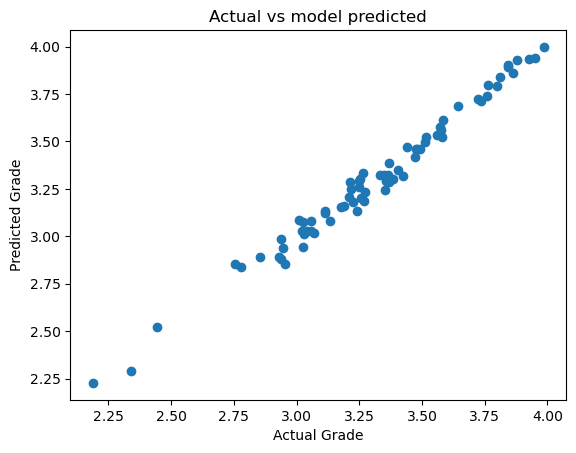

In [32]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Grade')
plt.ylabel('Predicted Grade')
plt.title('Actual vs model predicted')
plt.show()

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [34]:
y_pred=regression.predict(x_test)

In [35]:
y_pred

array([3.38583463, 2.98803938, 2.85575182, 3.15288544, 3.49785014,
       3.72164996, 2.89348715, 3.01902303, 3.08725896, 3.30022049,
       2.83746707, 3.41712894, 3.15798419, 3.71276527, 3.84181519,
       3.68477574, 3.31706274, 3.93282501, 3.34862189, 2.29029809,
       3.23454354, 3.33505523, 2.87811855, 3.20935028, 3.24556729,
       3.32475478, 2.89356313, 3.52146217, 3.30124332, 3.52167349,
       3.90231908, 3.46111922, 3.02737092, 3.0802204 , 2.85541174,
       3.28999086, 3.47246326, 3.28582324, 3.928032  , 3.28403704,
       2.22723364, 3.08143423, 3.07310412, 3.1335151 , 3.02661738,
       3.02728491, 3.45945839, 3.56261519, 2.93845695, 3.94248962,
       3.18201603, 3.01151264, 3.25129569, 3.32211609, 3.79110418,
       3.99853472, 3.8623887 , 3.12284416, 3.45920184, 3.79735658,
       3.13456059, 3.29412977, 3.57845785, 3.53655743, 3.89243328,
       3.26058514, 3.61396401, 3.18844997, 3.32264466, 3.20023011,
       2.94309053, 3.73851866, 2.52176555])

In [36]:
#MAE
mean_absolute_error(y_test,y_pred)

0.040630090808087764

In [37]:
#MSE
mean_squared_error(y_test,y_pred)

0.0024538368342679764

In [38]:
# RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

0.04953621739967613

In [39]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV


In [40]:
lasscv = LassoCV(alphas=None,max_iter=100)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100)

In [41]:
# best alpha paramenter
alpha=lasscv.alpha_
alpha

0.000369669495300797

In [42]:
# now that we have best parameter lets use Lasso regression and see how wellour data has fitted  before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)


Lasso(alpha=0.000369669495300797)

In [43]:
lasso_reg.score(x_test,y_test)*100

98.15579618032399

In [44]:
np.arange(0.001,0.1,0.01)

array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091])

In [45]:
# ridgeCV will return best alpha and coefficients after performing 10 cross validations
ridgeCV=RidgeCV(alphas=np.arange(0.001,0.1,0.01))
ridgeCV.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [46]:
ridgeCV.alpha_

0.09099999999999998

In [47]:
ridge_model=Ridge(alpha=ridgeCV.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [48]:
ridge_model.score(x_test,y_test)*100

98.15503254601242

In [49]:
# since we have already fit the scaler ,ou can transform the data
print('student grade prediction is:',regression.predict(scaler.transform([[4,1,3,3,3,2,2,4,4,3,3,3,2,2,4,4,3,3,3,2,2,4,4,3,3,3,2,2,4,4,3,3,3,2,2,4,4,3,3,2,2]])))

student grade prediction is: [3.31541214]
